In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf

In [88]:
dataset = pd.read_csv('/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')
dataset.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [89]:
##convert pixel from string to array
dataset['pixels']=dataset['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

In [90]:
dataset.shape

(23705, 5)

In [91]:
dataset.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [92]:
dataset['pixels']=dataset['pixels'].apply(lambda x: x.reshape(48,48,1))##picture has to be 3D tenso

In [93]:
dataset['pixels']=dataset['pixels'].apply(lambda x: x/255 )##scale the pixels

In [94]:
dataset.age.unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99])

In [95]:
dataset.ethnicity.unique()

array([2, 3, 4, 0, 1])

In [96]:
dataset.gender.unique()

array([0, 1])

In [97]:
print(sum(dataset.gender==0))##fairly balanced
print(sum(dataset.gender==1))

12391
11314


In [98]:
dataset

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[[0.5058824], [0.5019608], [0.5019608], [0.49..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[[0.6431373], [0.2901961], [0.43529412], [0.6..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[[0.2627451], [0.27450982], [0.2784314], [0.2..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[[0.75686276], [0.77254903], [0.7764706], [0...."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[[0.7921569], [0.8039216], [0.81960785], [0.8..."
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,"[[[0.49803922], [0.39215687], [0.36862746], [0..."
23701,99,1,1,20170120134639935.jpg.chip.jpg,"[[[0.09019608], [0.10980392], [0.1254902], [0...."
23702,99,2,1,20170110182418864.jpg.chip.jpg,"[[[0.23137255], [0.19607843], [0.14509805], [0..."
23703,99,2,1,20170117195405372.jpg.chip.jpg,"[[[0.1764706], [0.42352942], [0.47058824], [0...."


In [99]:
image=[]
age=[]
ethnicity=[]
gender=[]
for i,x in enumerate(dataset.pixels):
    image.append(x)
    age.append(dataset.loc[i][0:1])
    ethnicity.append(dataset.loc[i][1:2])
    gender.append(dataset.loc[i][2:3])

In [100]:
image=np.array(image).astype(np.float32)

In [101]:
age=np.array(age).astype(np.float32)
ethnicity=np.array(ethnicity).astype(np.float32)
gender=np.array(gender).astype(np.float32)

In [102]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
ethnicity=enc.fit_transform(ethnicity).toarray()
ethnicity

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [103]:
print(image.shape)
print(age.shape)
print(ethnicity.shape)
print(gender.shape)

(23705, 48, 48, 1)
(23705, 1)
(23705, 5)
(23705, 1)


In [104]:
from sklearn.model_selection import train_test_split

x_train, x_temp, age_y_train, age_y_temp = train_test_split(image, age, test_size=0.2, random_state=42, shuffle=True)
x_train, x_val, age_y_train, age_y_val = train_test_split(x_train, age_y_train, test_size=0.25, random_state=42, shuffle=True)

x_train_ethnicity, x_test_ethnicity, ethnicity_y_train, ethnicity_y_test = train_test_split(image, ethnicity, test_size=0.2, random_state=42, shuffle=True)
x_train_ethnicity, x_val_ethnicity, ethnicity_y_train, ethnicity_y_val = train_test_split(x_train_ethnicity, ethnicity_y_train, test_size=0.25, random_state=42, shuffle=True)

x_train_gender, x_test_gender, gender_y_train, gender_y_test = train_test_split(image, gender, test_size=0.2, random_state=42, shuffle=True)
x_train_gender, x_val_gender, gender_y_train, gender_y_val = train_test_split(x_train_gender, gender_y_train, test_size=0.25, random_state=42, shuffle=True)

In [105]:
len(x_train)

14223

In [106]:
len(x_test)

4741

In [107]:
print(len(age_y_train))
print(len(ethnicity_y_train))
print(len(gender_y_train))

14223
14223
14223


In [108]:
gender_y_train

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [109]:
x_train.shape

(14223, 48, 48, 1)

In [110]:
##Building the modle
age=tf.keras.models.Sequential()##to start the model


In [111]:

#first convolution layer
age.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=[48, 48, 1]))
##filter is the feature map to extract the feature, 3 mean is 3*3 size
age.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
age.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))##pool_size is dimension 2*2, stride 2 like it moves 2 square

##adding second convlution layer
age.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3))

age.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
age.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

##flatten the result to make input it to Neuronal network
age.add(tf.keras.layers.Flatten())

##first fully connected layer
age.add(tf.keras.layers.Dense(units=500,activation='relu'))
age.add(tf.keras.layers.Dropout(0.2))

##second fully connected layer
age.add(tf.keras.layers.Dense(units=500,activation='relu'))
age.add(tf.keras.layers.Dropout(0.2))

##output layet
age.add(tf.keras.layers.Dense(units=1,activation='linear'))##we consider age as a regression problem

        



In [112]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [113]:
##compile the model
age.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse'])

In [114]:
age.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 dropout_4 (Dropout)         (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 21, 21, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                  

In [128]:
#age_model=age.fit(x_train, age_y_train,batch_size=32,epochs=10)
age_model = age.fit(x_train, age_y_train, batch_size=32, epochs=25, validation_data=(x_val, age_y_val), callbacks=[early_stopping])

Epoch 1/25
445/445 [==============================] - 45s 102ms/step - loss: 56.2249 - mse: 56.2249 - val_loss: 133.5176 - val_mse: 133.5176
Epoch 2/25
445/445 [==============================] - 44s 100ms/step - loss: 54.3329 - mse: 54.3329 - val_loss: 131.6975 - val_mse: 131.6975
Epoch 3/25
445/445 [==============================] - 45s 100ms/step - loss: 51.6375 - mse: 51.6375 - val_loss: 89.1346 - val_mse: 89.1346
Epoch 4/25
445/445 [==============================] - 45s 102ms/step - loss: 48.5723 - mse: 48.5723 - val_loss: 105.2807 - val_mse: 105.2807
Epoch 5/25
445/445 [==============================] - 44s 99ms/step - loss: 48.2421 - mse: 48.2421 - val_loss: 103.8667 - val_mse: 103.8667
Epoch 6/25
445/445 [==============================] - 45s 101ms/step - loss: 45.6894 - mse: 45.6894 - val_loss: 95.5317 - val_mse: 95.5317


In [116]:
from keras.models import model_from_json
from keras.models import Sequential  # If you're using a Sequential model
from keras.layers import Dense, Conv2D, Flatten  # Example layers, adjust as per your model architecture


In [132]:
age_json = age.to_json()
with open("age_arch.json", "w") as json_file:
    json_file.write(age_json)
age.save_weights("age_weights.h5")

In [130]:
age.evaluate(x_test,age_y_test)

149/149 [==============================] - 2s 16ms/step - loss: 85.5468 - mse: 85.5468


[85.54680633544922, 85.54680633544922]

In [133]:
age_y_test

array([[49.],
       [39.],
       [ 8.],
       ...,
       [ 2.],
       [52.],
       [49.]], dtype=float32)

In [134]:
##predicting the value
age_y_pred=age.predict(x_test)
age_y_pred

149/149 [==============================] - 2s 17ms/step


array([[31.33025 ],
       [31.988167],
       [ 8.92181 ],
       ...,
       [12.494318],
       [46.943443],
       [42.91204 ]], dtype=float32)

In [135]:
np.concatenate((age_y_pred.reshape(len(age_y_pred),1),age_y_test.reshape(len(age_y_test),1)),1)##1 for verical of concatiantion and 0 for horizontal concatenation

array([[31.33025 , 49.      ],
       [31.988167, 39.      ],
       [ 8.92181 ,  8.      ],
       ...,
       [12.494318,  2.      ],
       [46.943443, 52.      ],
       [42.91204 , 49.      ]], dtype=float32)

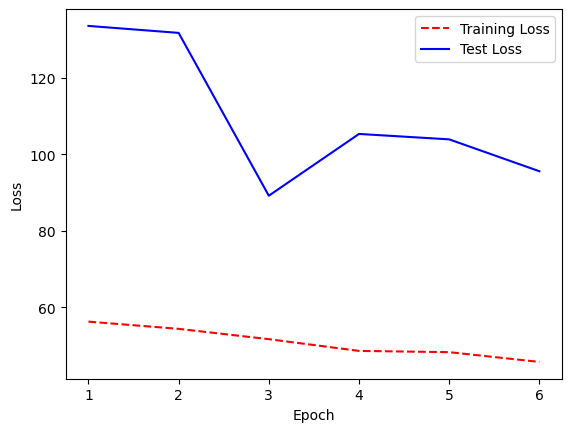

In [136]:
# Get training and test loss histories
training_loss = age_model.history['loss']
test_loss = age_model.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# **Gender**

In [138]:
##Building the model for gender
gender=tf.keras.models.Sequential()##to start the model


#first convolution layer
gender.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=[48, 48, 1]))
##filter is the feature map to extract the feature, 3 mean is 3*3 size
gender.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
gender.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))##pool_size is dimension 2*2, stride 2 like it moves 2 square

##adding second convlution layer
gender.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3))

gender.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
gender.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

##flatten the result to make input it to Neuronal network
gender.add(tf.keras.layers.Flatten())

##first fully connected layer
gender.add(tf.keras.layers.Dense(units=500,activation='relu'))
gender.add(tf.keras.layers.Dropout(0.2))

##second fully connected layer
gender.add(tf.keras.layers.Dense(units=500,activation='relu'))
gender.add(tf.keras.layers.Dropout(0.2))

##output layet
gender.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [139]:
gender.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [140]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [176]:
gender_model=gender.fit(x_train, gender_y_train,batch_size=32,epochs=10,validation_data=(x_val_ethnicity, ethnicity_y_val))

Epoch 1/10
445/445 [==============================] - 47s 105ms/step - loss: 0.1179 - accuracy: 0.9525 - val_loss: 2.5287 - val_accuracy: 0.4958
Epoch 2/10
445/445 [==============================] - 44s 99ms/step - loss: 0.0895 - accuracy: 0.9655 - val_loss: 2.8178 - val_accuracy: 0.4970
Epoch 4/10
445/445 [==============================] - 45s 102ms/step - loss: 0.0885 - accuracy: 0.9655 - val_loss: 2.7692 - val_accuracy: 0.5055
Epoch 5/10
445/445 [==============================] - 45s 101ms/step - loss: 0.0694 - accuracy: 0.9733 - val_loss: 2.8385 - val_accuracy: 0.5163
Epoch 6/10
445/445 [==============================] - 45s 102ms/step - loss: 0.0704 - accuracy: 0.9738 - val_loss: 3.0773 - val_accuracy: 0.5232
Epoch 7/10
445/445 [==============================] - 46s 103ms/step - loss: 0.0658 - accuracy: 0.9745 - val_loss: 2.8318 - val_accuracy: 0.5058
Epoch 8/10
445/445 [==============================] - 46s 104ms/step - loss: 0.0633 - accuracy: 0.9758 - val_loss: 3.4904 - val_acc

In [177]:
gender_json = gender.to_json()
with open("gender_arch.json", "w") as json_file:
    json_file.write(gender_json)
age.save_weights("gender_weights.h5")

In [178]:
gender.evaluate(x_test,gender_y_test)

149/149 [==============================] - 3s 17ms/step - loss: 0.4722 - accuracy: 0.8747


[0.4722139537334442, 0.874709963798523]

In [179]:
y_hat_gender=gender.predict(x_test)
y_predict=(y_hat_gender>0.5)##if y_predict>0.5 it will return 1 else will return 0

149/149 [==============================] - 2s 17ms/step


In [180]:
y_predict

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [181]:
print(np.concatenate((y_predict.reshape(len(y_predict),1),gender_y_test.reshape(len(gender_y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(gender_y_test,y_predict)
print(cm)
accuracy_score(gender_y_test,y_predict)

[[2192  276]
 [ 318 1955]]


0.8747099767981439

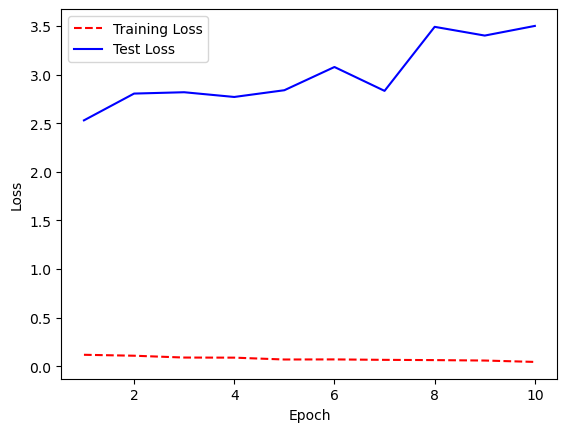

In [183]:
# Get training and test loss histories
training_loss = gender_model.history['loss']
test_loss = gender_model.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# **Ethinicity**

In [147]:
##model for ethnicity

ethnicity=tf.keras.models.Sequential()##to start the model

##Building the model for gender


#first convolution layer
ethnicity.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=[48, 48, 1]))
##filter is the feature map to extract the feature, 3 mean is 3*3 size
ethnicity.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
ethnicity.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))##pool_size is dimension 2*2, stride 2 like it moves 2 square

##adding second convlution layer
ethnicity.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3))

ethnicity.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
ethnicity.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

##flatten the result to make input it to Neuronal network
ethnicity.add(tf.keras.layers.Flatten())

##first fully connected layer
ethnicity.add(tf.keras.layers.Dense(units=500,activation='relu'))
ethnicity.add(tf.keras.layers.Dropout(0.2))

##second fully connected layer
ethnicity.add(tf.keras.layers.Dense(units=500,activation='relu'))
ethnicity.add(tf.keras.layers.Dropout(0.2))

##output layet
ethnicity.add(tf.keras.layers.Dense(units=5,activation='softmax'))##5 ethnicity


In [149]:
#piling our model
ethnicity.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [150]:
ethnicity.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 dropout_12 (Dropout)        (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 dropout_13 (Dropout)        (None, 21, 21, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                  

In [151]:
ethnicity_model = ethnicity.fit(
    x_train_ethnicity, ethnicity_y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_val_ethnicity, ethnicity_y_val)
)


Epoch 1/10
445/445 [==============================] - 49s 106ms/step - loss: 1.0654 - accuracy: 0.6057 - val_loss: 0.8245 - val_accuracy: 0.7216
Epoch 2/10
445/445 [==============================] - 47s 105ms/step - loss: 0.7927 - accuracy: 0.7247 - val_loss: 0.7442 - val_accuracy: 0.7444
Epoch 3/10
445/445 [==============================] - 47s 105ms/step - loss: 0.7084 - accuracy: 0.7533 - val_loss: 0.7590 - val_accuracy: 0.7422
Epoch 4/10
445/445 [==============================] - 48s 108ms/step - loss: 0.6295 - accuracy: 0.7857 - val_loss: 0.7000 - val_accuracy: 0.7610
Epoch 5/10
445/445 [==============================] - 48s 107ms/step - loss: 0.5781 - accuracy: 0.7992 - val_loss: 0.6654 - val_accuracy: 0.7678
Epoch 6/10
445/445 [==============================] - 48s 108ms/step - loss: 0.5276 - accuracy: 0.8166 - val_loss: 0.6665 - val_accuracy: 0.7703
Epoch 7/10
445/445 [==============================] - 47s 106ms/step - loss: 0.4707 - accuracy: 0.8358 - val_loss: 0.6618 - val_ac

In [153]:
ethnicity_json = ethnicity.to_json()
with open("ethnicity_arch.json", "w") as json_file:
    json_file.write(ethnicity_json)
age.save_weights("ethnicity_weights.h5")

In [154]:
y_hat_ethnicity=ethnicity.predict(x_test)
y_hat_ethnicity

149/149 [==============================] - 3s 19ms/step


array([[2.2781937e-01, 2.5532913e-01, 1.4237135e-02, 1.1271530e-01,
        3.8989899e-01],
       [3.5423997e-03, 9.8840207e-01, 7.3666853e-04, 7.2647766e-03,
        5.4215929e-05],
       [1.0927928e-01, 3.0194166e-01, 1.2359300e-02, 2.6004510e-02,
        5.5041522e-01],
       ...,
       [9.2944577e-03, 7.2785139e-01, 4.2849936e-04, 2.4539511e-01,
        1.7030595e-02],
       [9.4674867e-01, 1.4295648e-03, 6.1348983e-06, 4.8696022e-03,
        4.6945944e-02],
       [9.2079753e-01, 1.3301303e-04, 2.5155586e-03, 3.1798702e-02,
        4.4755209e-02]], dtype=float32)

In [156]:
y=y_hat_ethnicity.flatten()

In [157]:
y.shape

(23705,)

In [158]:
y_hat_ethnicity.shape

(4741, 5)

In [159]:
y_=(y>0.5)
y_

array([False, False, False, ..., False, False, False])

In [161]:
y_hat_ethnic=np.zeros((len(y)))
for i in range(len(y_)):
    if y_[i] ==False:
               y_hat_ethnic[i]=0
    else:
               y_hat_ethnic[i]=1
               

In [162]:
ethnic_predicted=y_hat_ethnic.reshape(4741,5)
ethnic_predicted

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [163]:
ethnicity_y_test

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [164]:
##reversing hot endcoding for y_test
y_test=np.zeros((len(ethnicity_y_test)))
for i in range(len(ethnicity_y_test)):
    y_test[i]=np.argmax(ethnicity_y_test[i])

y_test

array([1., 1., 4., ..., 3., 0., 0.])

In [165]:
y_test=y_test.reshape(len(ethnicity_y_test),1)
y_test

array([[1.],
       [1.],
       [4.],
       ...,
       [3.],
       [0.],
       [0.]])

In [166]:
y_predicted=np.zeros((len(ethnic_predicted)))
for i in range(len(ethnic_predicted)):
    y_predicted[i]=np.argmax(ethnic_predicted[i])

y_predicted

array([0., 1., 4., ..., 1., 0., 0.])

In [167]:
y_predicted=y_predicted.reshape(len(ethnic_predicted),1)
y_predicted

array([[0.],
       [1.],
       [4.],
       ...,
       [1.],
       [0.],
       [0.]])

In [168]:
print(np.concatenate((y_predicted.reshape(len(y_predicted),1),y_test.reshape(len(y_test),1)),1))

[[0. 1.]
 [1. 1.]
 [4. 4.]
 ...
 [1. 3.]
 [0. 0.]
 [0. 0.]]


In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predicted)
print(cm)
accuracy_score(y_test,y_predicted)

[[1883   51   38   46   29]
 [ 137  717    8   27   15]
 [ 154   13  470    7   13]
 [ 248   44   13  477   22]
 [ 203   23   11   38   54]]


0.7595443999156296

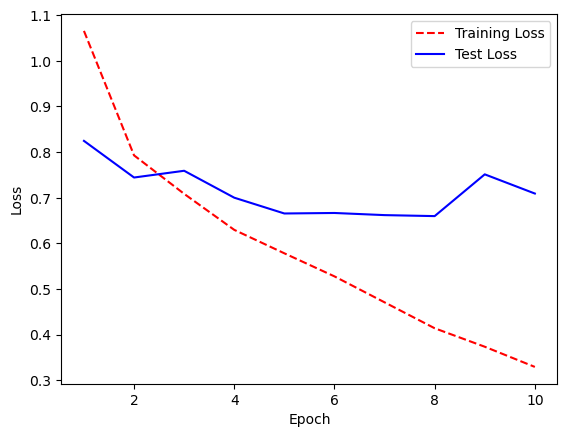

In [172]:
# Get training and test loss histories
training_loss = ethnicity_model.history['loss']
test_loss = ethnicity_model.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();